<center><img src="HERE.gif" alt="Wait For It !!!"></center>


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Importing Libraries</h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from  sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report , ConfusionMatrixDisplay
from sklearn.model_selection import  cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier, plot_importance

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;"> Loading Data</h1>

In [2]:
df = pd.read_csv('creditcard.csv')

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;"> EDA</h1>

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;"> Null Values</h1>

In [6]:
null_df = df.isnull().sum()[df.isnull().sum() > 0].sort_values().to_frame().rename(columns={0: "Total Missing values"})
null_df["% of Missing Values"] = round(null_df["Total Missing values"]/len(df)*100, 2)
null_df["Feature Data Type"] = df[null_df.index.tolist()].dtypes

null_df

,Total Missing values,% of Missing Values,Feature Data Type


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Duplicate</h1>

In [7]:
df.duplicated().sum()

1081

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [10]:
print(legit.shape)
print(fraud.shape)

(283253, 31)
(473, 31)


In [11]:
print('Not Frauds', round(df['Class'].value_counts()[0]/len(df) * 100, 2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100, 2), '% of the dataset')

Not Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [12]:
legit.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [13]:
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [14]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


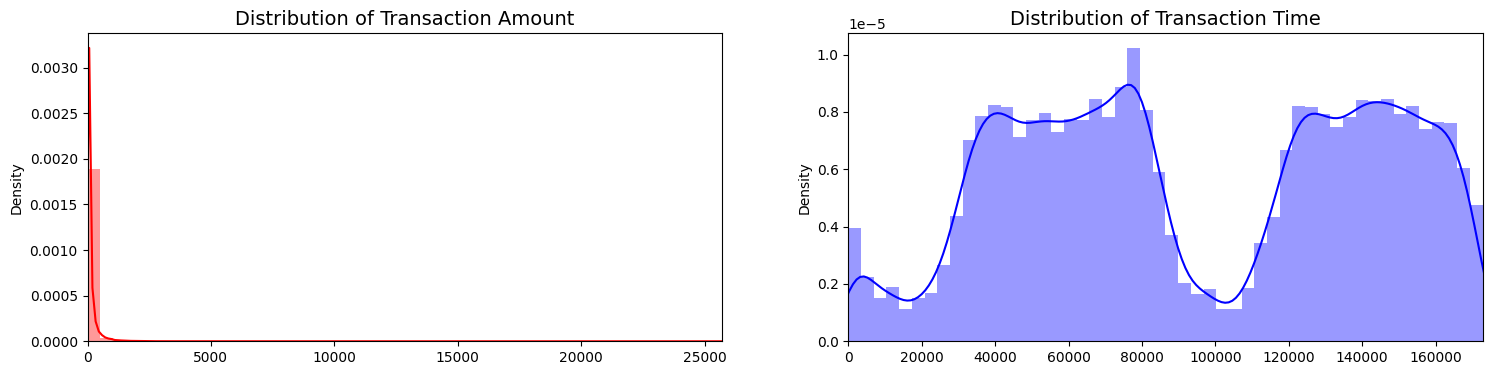

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])


plt.show()

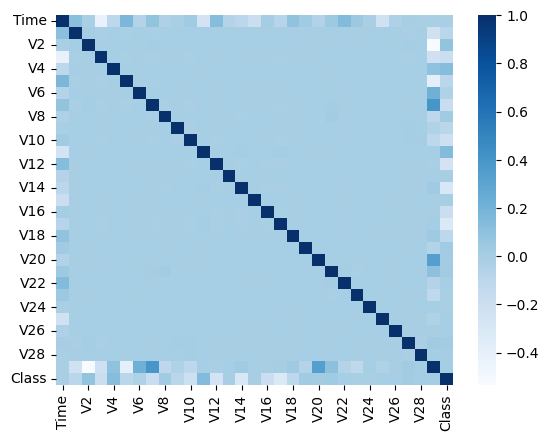

In [16]:
dataplot = sns.heatmap(df.corr(), cmap="Blues")
plt.show()

<Axes: xlabel='Class', ylabel='count'>

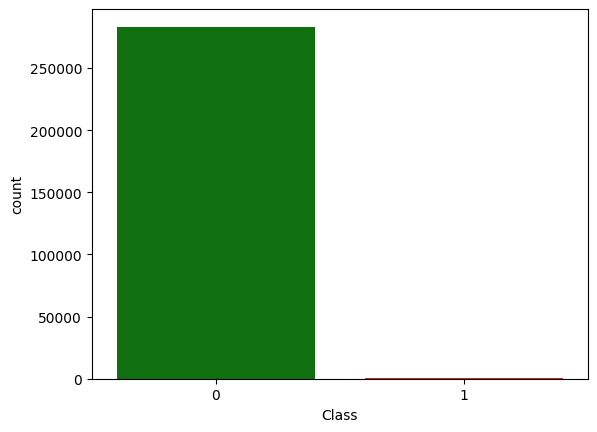

In [17]:
sns.countplot(x='Class', data=df ,palette=['g','r'])

In [18]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

<div style="border-radius:10px; padding: 15px; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Note:</font></h3>
So Here We Have Very Large Sample Of **Fraud** So We Can't Feed Them To The Model Directly Or The **Fraud**
Will Dominate The Whole Percentage
<h4>the solution is In this scenario, our subsample will be a dataframe with a 50/50 ratio of fraud 
and non-fraud transactions. Meaning our sub-sample will have the same amount of fraud and non fraud transactions</h4>

In [19]:
legit_sample = legit.sample(n=492)
new_df = pd.concat([legit_sample, fraud], axis = 0)

In [20]:
new_df.shape

(965, 31)

In [21]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
173736,121621.0,1.985945,-0.451960,-0.192567,0.497602,-0.850656,-0.528742,-0.680461,-0.026477,1.284732,...,0.163502,0.707178,0.176571,0.041409,-0.299696,0.572447,-0.016007,-0.048187,5.74,0
42658,41189.0,1.239881,0.173246,0.391766,0.430660,-0.284315,-0.486445,-0.063725,-0.024240,-0.156626,...,-0.229844,-0.711568,0.086246,-0.008442,0.222983,0.098196,-0.034877,0.005050,1.98,0
179924,124294.0,-0.181426,1.868894,-0.038667,4.439202,0.402585,-0.051232,0.469005,0.243153,-2.124238,...,0.414439,1.306811,0.143360,-0.000310,-1.185403,0.382823,0.314281,0.271614,15.17,0
219851,141911.0,2.047980,-1.043042,-3.024369,-1.811187,0.254474,-1.532021,0.738578,-0.723196,-0.456873,...,-0.019417,0.309694,-0.267152,0.572918,0.635852,0.646524,-0.123293,-0.060920,156.24,0
187675,127639.0,-0.241759,1.186813,-0.568719,-0.533526,0.462166,-0.794410,0.627712,0.269179,-0.471026,...,0.444414,1.411971,-0.140020,-0.287530,-0.743730,-0.218365,0.383741,0.247463,0.89,0


In [22]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

Distribution of the Classes in the subsample dataset
Class
0    0.509845
1    0.490155
Name: count, dtype: float64


<Axes: xlabel='Class', ylabel='count'>

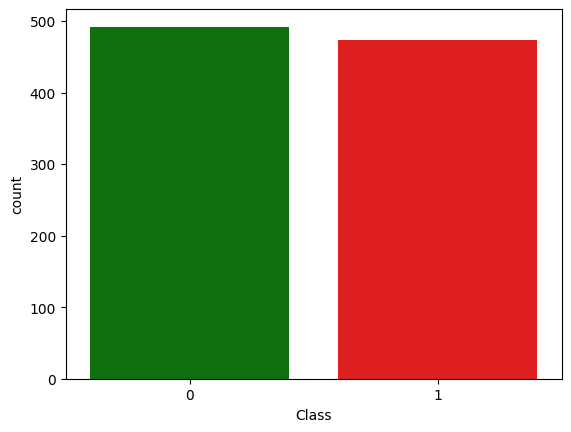

In [23]:
sns.countplot(x='Class', data=new_df , palette=['g','r'])

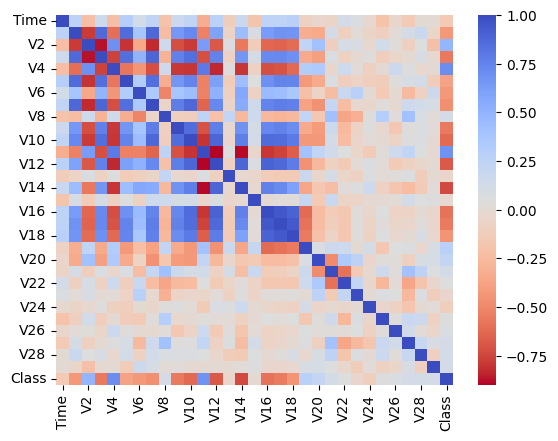

In [24]:
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size': 20})
plt.show()

In [ ]:
efdbr

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;"> Train & Test Split</h1>

In [26]:
X = new_df.drop(columns='Class', axis=1)
Y = new_df['Class']

In [27]:
X.shape

(965, 30)

In [28]:
Y.shape

(965,)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;"> 1- Logistic Regression</h1>

In [30]:
logistic_Regression = LogisticRegression(max_iter=120, random_state=0,n_jobs=20, solver='liblinear')
logistic_Regression.fit(X_train, y_train)

train_accuracy = logistic_Regression.score(X_train, y_train)
print(f"Train Accuracy: {train_accuracy:.2%}")

y_pred = logistic_Regression.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2%}")

Train Accuracy: 92.26%
Test Accuracy: 91.54%


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;"> 2- Decision Tree Classifier</h1>

In [31]:
Decision_Tree = DecisionTreeClassifier(random_state=45)
Decision_Tree.fit(X_train, y_train)


train_accuracy = Decision_Tree.score(X_train, y_train)
print(f"Train Accuracy: {train_accuracy:.2%}")

y_pred = Decision_Tree.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2%}")

Train Accuracy: 100.00%
Test Accuracy: 89.66%


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;"> 3- Support Vector Classifier</h1>

In [32]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

train_accuracy = svc.score(X_train, y_train)
print(f"Train Accuracy: {train_accuracy:.2%}")

y_pred = svc.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2%}")

Train Accuracy: 88.85%
Test Accuracy: 88.71%


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">4- Random Forest Classifier </h1>

In [33]:
Random_Forest = RandomForestClassifier()
Random_Forest.fit(X_train, y_train)

train_accuracy = Random_Forest.score(X_train, y_train)
print(f"Train Accuracy: {train_accuracy:.2%}")

y_pred = Random_Forest.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2%}")

Train Accuracy: 100.00%
Test Accuracy: 92.48%


5- XGB Classifier

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

train_accuracy = xgb.score(X_train, y_train)
print(f"Train Accuracy: {train_accuracy:.2%}")

y_pred = xgb.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2%}")

In [ ]:
plot_importance(xgb)
plt.show()

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;"> Now We Will Do Cross Validiation </h1>

In [34]:
models = [logistic_Regression, Random_Forest, svc, Decision_Tree]


def compare_models_cross_validation():

  for model in models:

    cv_score = cross_val_score(model, X, Y, cv=5)

    mean_accuracy = sum(cv_score)/len(cv_score)

    mean_accuracy = mean_accuracy*100

    mean_accuracy = round(mean_accuracy, 2)

    print('Cross Validation accuracies for ', model, '=  ', cv_score)
    print('Accuracy % of the ', model, '=', mean_accuracy)
    print('----------------------------------------------')

In [35]:
compare_models_cross_validation()

Cross Validation accuracies for  LogisticRegression(max_iter=120, n_jobs=20, random_state=0, solver='liblinear') =   [0.90673575 0.93264249 0.91709845 0.92227979 0.83937824]
Accuracy % of the  LogisticRegression(max_iter=120, n_jobs=20, random_state=0, solver='liblinear') = 90.36
----------------------------------------------
Cross Validation accuracies for  RandomForestClassifier() =   [0.96891192 0.93782383 0.92227979 0.94300518 0.9119171 ]
Accuracy % of the  RandomForestClassifier() = 93.68
----------------------------------------------
Cross Validation accuracies for  SVC(kernel='linear') =   [0.96373057 0.92227979 0.84974093 0.90673575 0.69430052]
Accuracy % of the  SVC(kernel='linear') = 86.74
----------------------------------------------
Cross Validation accuracies for  DecisionTreeClassifier(random_state=45) =   [0.93264249 0.93264249 0.85492228 0.9119171  0.50259067]
Accuracy % of the  DecisionTreeClassifier(random_state=45) = 82.69
-------------------------------------------

In [36]:
# #cuz we will pick Random Forest so i made this for specific cross val 
# cv_score_lr = cross_val_score(RandomForestClassifier(), X, Y, cv=5)
# print(cv_score_lr)
# mean_accuracy_lr = sum(cv_score_lr)/len(cv_score_lr)
# mean_accuracy_lr = mean_accuracy_lr*100
# mean_accuracy_lr = round(mean_accuracy_lr, 2)
# print(mean_accuracy_lr)

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">HyperParameter Tunning For Random Forest  </h1>

In [37]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [2, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# Create a RandomForestClassifier instance
rf = RandomForestClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, scoring='accuracy', cv=5)

# Fit the model to your training data
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best parameters and score
print("Best parameters:", best_params)
print("Best score:", grid_search.best_score_)

KeyboardInterrupt: 

In [ ]:
result = pd.DataFrame(grid_search.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.057313,0.011591,0.003732,0.003119,2,2,10,"{'max_depth': 2, 'min_samples_split': 2, 'n_es...",0.946154,0.922481,0.937984,0.922481,0.930233,0.931866,0.009170,22
1,0.211872,0.027826,0.014266,0.007702,2,2,50,"{'max_depth': 2, 'min_samples_split': 2, 'n_es...",0.938462,0.914729,0.945736,0.899225,0.930233,0.925677,0.016770,44
2,0.350767,0.049353,0.016412,0.004785,2,2,100,"{'max_depth': 2, 'min_samples_split': 2, 'n_es...",0.930769,0.914729,0.953488,0.899225,0.930233,0.925689,0.018109,40
3,0.583197,0.063855,0.025120,0.006093,2,2,200,"{'max_depth': 2, 'min_samples_split': 2, 'n_es...",0.930769,0.922481,0.953488,0.899225,0.930233,0.927239,0.017423,36
4,0.025177,0.005806,0.003126,0.006253,2,5,10,"{'max_depth': 2, 'min_samples_split': 5, 'n_es...",0.946154,0.922481,0.945736,0.891473,0.930233,0.927215,0.020054,38


In [ ]:
randomized_search_result = result[['param_n_estimators','param_max_depth','param_min_samples_split', 'mean_test_score']]
randomized_search_result = randomized_search_result.sort_values(by='mean_test_score', ascending=False)
randomized_search_result.head(3)

,param_n_estimators,param_max_depth,param_min_samples_split,mean_test_score
41,50,20,5,0.939595
19,200,5,5,0.938056
22,100,5,10,0.938056


In [ ]:
rfc = RandomForestClassifier(n_estimators=50,max_depth=20,min_samples_split=5)
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       162
           1       0.97      0.89      0.92       157

    accuracy                           0.93       319
   macro avg       0.93      0.93      0.93       319
weighted avg       0.93      0.93      0.93       319



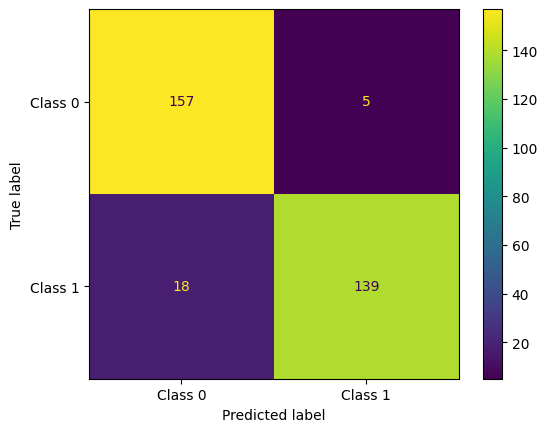

In [ ]:
cm = confusion_matrix(y_test, y_pred_rfc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot()
plt.show()

<Axes: >

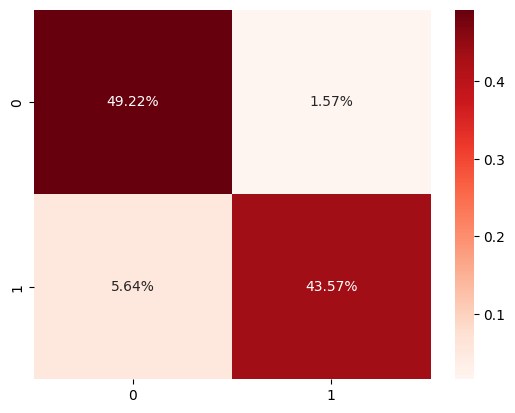

In [ ]:
cm1 = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cm1/np.sum(cm1), annot=True, fmt='0.2%', cmap='Reds')


<center><h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">So Random Forest Is the Best Model With Highest Accuracy Among All Models </h1></center>